In [ ]:
#importing libraries 
import numpy as np 
import pandas as pd 
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Loading the Dataset
data = pd.read_csv('new_prodco2.csv', sep=',')
data.head() 

,year,cement_co2,coal_co2,oil_co2,cumulative_co2,share_global_cumulative_co2,cement_co2_per_capita,coal_co2_per_capita,oil_co2_per_capita,flaring_co2,flaring_co2_per_capita,gas_co2,gas_co2_per_capita,share_global_co2,co2
0,1802,7.8149,2.239,92.344,2.239,6.086,0.14742,0.076,1.672591,4.025,0.069585,44.43,0.769882,6.086,2.239
1,1804,7.8149,2.176,92.344,4.415,6.210,0.14742,0.073,1.672591,4.025,0.069585,44.43,0.769882,6.343,2.176
2,1810,7.8149,2.121,92.344,6.537,6.026,0.14742,0.070,1.672591,4.025,0.069585,44.43,0.769882,5.675,2.121
3,1811,7.8149,2.052,92.344,8.588,5.801,0.14742,0.068,1.672591,4.025,0.069585,44.43,0.769882,5.184,2.052
4,1812,7.8149,2.217,92.344,10.805,5.715,0.14742,0.073,1.672591,4.025,0.069585,44.43,0.769882,5.406,2.217


In [ ]:
data=data.dropna(how='any')
data.head()

,year,cement_co2,coal_co2,oil_co2,cumulative_co2,share_global_cumulative_co2,cement_co2_per_capita,coal_co2_per_capita,oil_co2_per_capita,flaring_co2,flaring_co2_per_capita,gas_co2,gas_co2_per_capita,share_global_co2,co2
0,1802,7.8149,2.239,92.344,2.239,6.086,0.14742,0.076,1.672591,4.025,0.069585,44.43,0.769882,6.086,2.239
1,1804,7.8149,2.176,92.344,4.415,6.210,0.14742,0.073,1.672591,4.025,0.069585,44.43,0.769882,6.343,2.176
2,1810,7.8149,2.121,92.344,6.537,6.026,0.14742,0.070,1.672591,4.025,0.069585,44.43,0.769882,5.675,2.121
3,1811,7.8149,2.052,92.344,8.588,5.801,0.14742,0.068,1.672591,4.025,0.069585,44.43,0.769882,5.184,2.052
4,1812,7.8149,2.217,92.344,10.805,5.715,0.14742,0.073,1.672591,4.025,0.069585,44.43,0.769882,5.406,2.217


In [ ]:
data.shape

(211, 15)

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data.describe()

,year,cement_co2,coal_co2,oil_co2,cumulative_co2,share_global_cumulative_co2,cement_co2_per_capita,coal_co2_per_capita,oil_co2_per_capita,flaring_co2,flaring_co2_per_capita,gas_co2,gas_co2_per_capita,share_global_co2,co2
count,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000
mean,1912.947867,7.814913,89.420223,92.344180,10148.845659,6.396754,0.147420,2.046384,1.672591,4.025038,0.069585,44.432498,0.769882,5.687493,179.871441
std,61.146601,2.570681,63.767927,101.443217,11372.478155,2.468972,0.046734,1.508761,1.812144,0.393727,0.007954,21.559613,0.344897,3.371310,157.994524
min,1802.000000,0.740000,2.048000,0.037000,2.239000,2.356000,0.019000,0.067000,0.001000,0.934000,0.017000,0.004000,0.002000,0.924000,2.048000
25%,1860.500000,7.814900,37.241500,0.553000,667.907000,4.439500,0.147420,0.791000,0.014000,4.025000,0.069585,44.430000,0.769882,2.933000,39.686500
50%,1913.000000,7.814900,78.959000,92.344000,5552.081000,6.034000,0.147420,1.731000,1.672591,4.025000,0.069585,44.430000,0.769882,5.243000,125.998000
75%,1965.500000,7.814900,134.573500,156.942000,16152.160000,8.651500,0.147420,3.132000,3.101500,4.025000,0.069585,44.430000,0.769882,8.528500,339.509500
max,2018.000000,15.467000,233.851000,351.052000,37952.880000,10.703000,0.295000,5.613000,6.754000,5.324000,0.104000,98.496000,1.612000,12.718000,530.281000


In [ ]:
data.columns.values  # column names

array(['year', 'cement_co2', 'coal_co2', 'oil_co2', 'cumulative_co2',
       'share_global_cumulative_co2', 'cement_co2_per_capita',
       'coal_co2_per_capita', 'oil_co2_per_capita', 'flaring_co2',
       'flaring_co2_per_capita', 'gas_co2', 'gas_co2_per_capita',
       'share_global_co2', 'co2'], dtype=object)

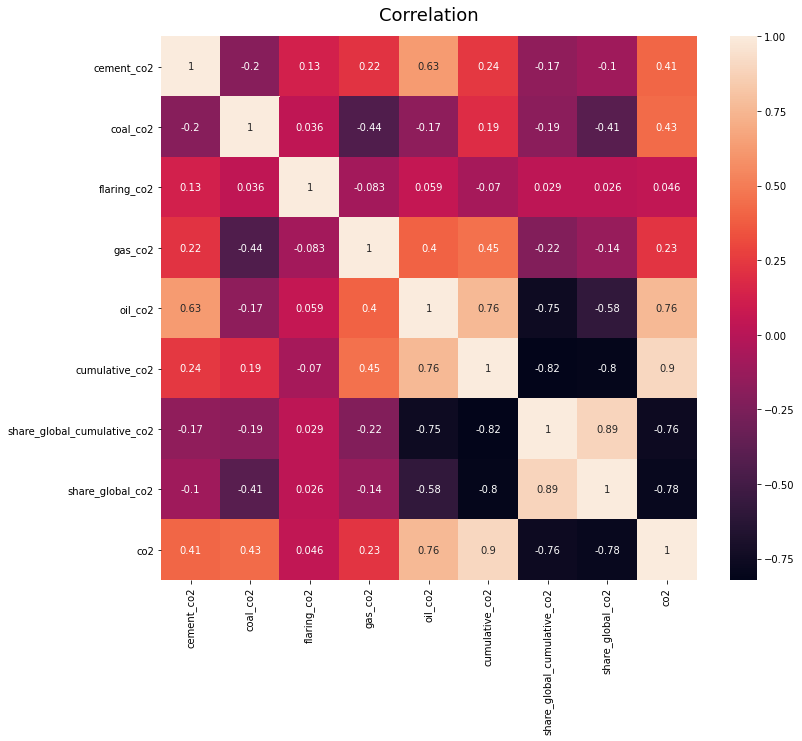

In [ ]:
#Heatmap 
plt.figure(figsize=(12,10))
df=data[['cement_co2', 'coal_co2', 'flaring_co2', 'gas_co2',
       'oil_co2','cumulative_co2', 'share_global_cumulative_co2',
       'share_global_co2','co2']]

corrmatrix=df.corr()
heatmap=sns.heatmap(corrmatrix,annot=True)
heatmap.set_title('Correlation', fontdict={'fontsize':18}, pad=16)
plt.show()

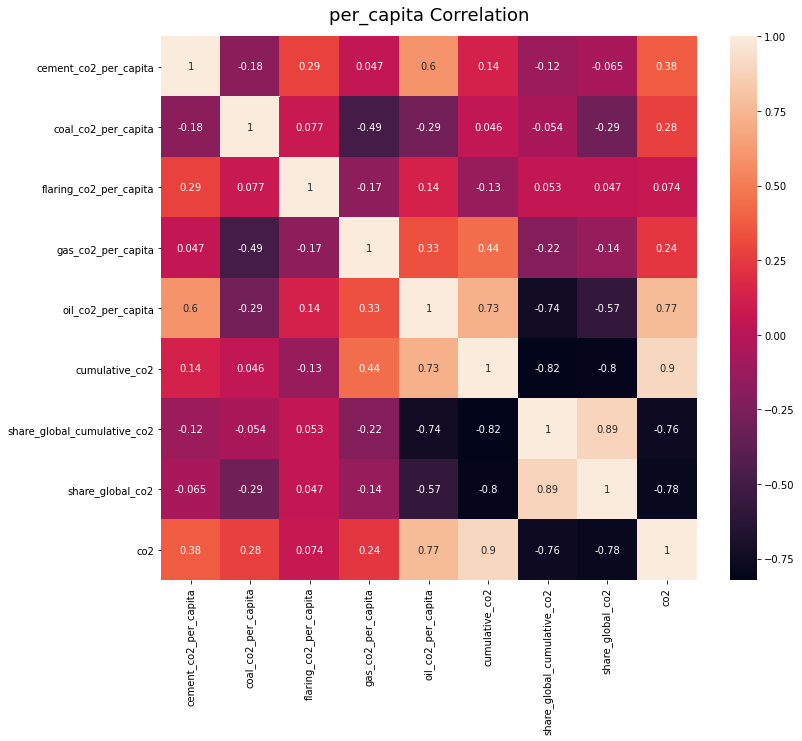

In [ ]:
#per_capita values correlation check
plt.figure(figsize=(12,10))
df_1=data[['cement_co2_per_capita', 'coal_co2_per_capita',
       'flaring_co2_per_capita', 'gas_co2_per_capita',
       'oil_co2_per_capita','cumulative_co2', 
       'share_global_cumulative_co2', 'share_global_co2','co2']]

corrmatrix=df_1.corr()
heatmap=sns.heatmap(corrmatrix,annot=True)
heatmap.set_title('per_capita Correlation', fontdict={'fontsize':18}, pad=16)
plt.show()

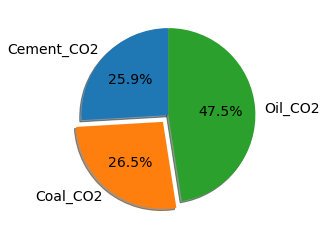

In [ ]:
# Visualizing the values of the 3 classes before nlp model
import matplotlib.pyplot as plt

distribution= ['Cement_CO2','Coal_CO2','Oil_CO2'] 
values = [0.42,0.43,0.77] 
import matplotlib.pyplot as plt
 

fig_pie, ax1 = plt.subplots()
explode = (0, 0.1, 0) 
ax1.pie(values, explode=explode, labels=distribution,autopct='%1.1f%%',
        shadow=True, startangle=90,textprops={'fontsize': 14})
 
plt.show()

In [ ]:
#Production based CO2 calculation
X = data.iloc[:, 1:4].values  #cement,coal and oil only
y=data.iloc[:,14:15].values #co2 (annual production based co2)

In [ ]:
#Global share calculation
X1=data.iloc[:, 1:6].values
y1=data.iloc[:,-2].values #global share 

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0) #CO2
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.20, random_state = 0) #global share


In [ ]:
#DATA NORMALIZATION
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
#transform data
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
X1_train=scaler.fit_transform(X1_train)
X1_test=scaler.transform(X1_test)

# CO2 
y_train=y_train.reshape(-1, 1) 
y_train=scaler.fit_transform(y_train)
y_test=y_test.reshape(-1,1)
y_test=scaler.transform(y_test)

#Global Share CO2
y1_train=y1_train.reshape(-1, 1) 
y1_train=scaler.fit_transform(y1_train)
y1_test=y1_test.reshape(-1,1)
y1_test=scaler.transform(y1_test)


In [ ]:
#Model fit
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

#co2
random_forest_reg = RandomForestRegressor(n_estimators = 10,random_state=0)
random_forest_reg.fit(X_train, y_train)
rf_pred=random_forest_reg.predict(X_test)

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator =random_forest_reg, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
mse_rf=mean_squared_error(y_test,rf_pred)
print("MSE : {:.2f}%".format(mse_rf*100))

Accuracy: 99.64 %
Standard Deviation: 0.14 %
MSE : 0.02%


In [ ]:
# regression score function
from sklearn.metrics import r2_score
r2_score = r2_score(y_test,rf_pred)
r2_score

0.9977118567280049

In [ ]:
#Global share co2 
random_forest_reg1 = RandomForestRegressor(n_estimators = 10,random_state=0)
random_forest_reg1.fit(X1_train, y1_train)
rf_pred1=random_forest_reg1.predict(X1_test)

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator =random_forest_reg1, X = X1_train, y = y1_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
mse_rf1=mean_squared_error(y1_test,rf_pred1)
print("MSE : {:.2f}%".format(mse_rf1*100))


Accuracy: 97.84 %
Standard Deviation: 1.16 %
MSE : 0.22%


In [ ]:
#XGBOOST MODEL - NET CO2
from xgboost import XGBRegressor
xgb_reg = XGBRegressor(booster='gbtree',learning_rate =0.1,verbosity=0,n_estimators=20 , 
                       eval_metric='rmse')
xgb_reg.fit(X_train, y_train)
# Creating some predictions.
xgb_pred = xgb_reg.predict( X_test)

# K-fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator =xgb_reg, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

# mean squared error calculation
from sklearn.metrics import mean_squared_error
mse_xgb=mean_squared_error(y_test, xgb_pred)
print("MSE : {:.2f}%".format(mse_xgb*100))

Accuracy: 97.06 %
Standard Deviation: 0.57 %
MSE : 0.30%


In [ ]:
print(xgb_reg)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eval_metric='rmse',
             gamma=0, importance_type='gain', learning_rate=0.1,
             max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
             n_estimators=20, n_jobs=1, nthread=None, objective='reg:linear',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=0)


In [ ]:
# XGBOOST - Global share Co2
#XGBOOST MODEL - NET CO2
from xgboost import XGBRegressor

xgb_reg1 = XGBRegressor(booster='gbtree',learning_rate =0.1,verbosity=0,n_estimators=20 , 
                       eval_metric='rmse')
xgb_reg1.fit(X1_train, y1_train)
# Creating some predictions.
xgb_pred1 = xgb_reg1.predict( X1_test)

# K-fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator =xgb_reg1, X = X1_train, y = y1_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

# mean squared error calculation
from sklearn.metrics import mean_squared_error
mse_xgb1=mean_squared_error(y1_test, xgb_pred1)
print("MSE : {:.2f}%".format(mse_xgb1*100))


Accuracy: 94.50 %
Standard Deviation: 1.76 %
MSE : 0.46%


In [ ]:
pip install chart_studio

     |████████████████████████████████| 71kB 3.2MB/s 


In [ ]:
#Hosting visualization using chartstudio
import chart_studio
import chart_studio.plotly as py

In [ ]:
#plot graph for  CO2 REAL VALUES
real_co2=data['co2']
x_axis= data['year'] #years

fig_0= px.scatter(x=x_axis, y=real_co2,trendline='ols')
# Edit the layout
fig_0.update_layout(title='Real CO2 Values',
                   xaxis_title='Years',
                   yaxis_title=' Annual Production based CO2 (miilion tonnes per year)')
fig_0.show()

In [ ]:
#last 50 years values for co2
#prepare array data for prod based co2
last50_prodco2=data['co2'].to_numpy()
prod_co2=last50_prodco2[160:210]
years_array=data['year'].to_numpy()
x=years_array[160:210] #years
#Plotting annual temp readings- Line plot

fig_1= px.scatter(x=x, y=prod_co2, trendline='lowess')
# Edit the layout
fig_1.update_layout(title='PRODUCTION CO2 for last 50 years ',
                   xaxis_title='Years',
                   yaxis_title=' CO2 ')
fig_1.show()

In [ ]:
# predicted values of CO2 using Random Forest 

x=[2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,
   2035,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047,2048.2049,2050,2051,2052,2053,2054,2055,2056,
   2057,2058,2059,2060,2061]
co2_rf=rf_pred
#Plotting readings

fig_2 = px.scatter(x=x, y=co2_rf,trendline='lowess')

# Edit the layout
fig_2.update_layout(title='Predicted values for Production based CO2- RF',
                   xaxis_title='Years',
                   yaxis_title='C02')
fig_2.show()


In [ ]:
#predicted values using XGBOOST -CO2
x=[2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,
   2035,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047,2048.2049,2050,2051,2052,2053,2054,2055,2056,
   2057,2058,2059,2060,2061]
co2_pred=xgb_pred
#Plotting readings

fig_6 = px.scatter(x=x, y=co2_pred,trendline='lowess')

# Edit the layout
fig_6.update_layout(title='Predicted values for Production based CO2- XGBOOST',
                   xaxis_title='Years',
                   yaxis_title='C02')
fig_6.show()

In [ ]:
#plot graph for real global share CO2 REAL VALUES
years_array=data['year'].to_numpy()

x=years_array
y=data['share_global_co2']
fig_3= px.scatter(x=x, y=y,trendline='lowess')
# Edit the layout
fig_3.update_layout(title='Real Values of Global Share CO2',
                   xaxis_title='Years',
                   yaxis_title='Global Share CO2 ')
fig_3.show()

In [ ]:
#plot graph for real global share CO2 REAL VALUES last 50 years
share=data['share_global_co2'].to_numpy()
last50_share=share[160:210]
years_array=data['year'].to_numpy()
x=years_array[160:210] #years

#Plotting annual temp readings- Line plot

fig_4= px.scatter(x=x, y=last50_share,trendline='lowess')
# Edit the layout
fig_4.update_layout(title='Global Share CO2 in last 50 years',
                   xaxis_title='Years',
                   yaxis_title='Global Share CO2 ')
fig_4.show()

In [ ]:
# predicted values of Global Share CO2 of France using Random Forest 

x=[2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,
   2035,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047,2048.2049,2050,2051,2052,2053,2054,2055,2056,
   2057,2058,2059,2060,2061]
co2_rf=rf_pred1
#Plotting readings

fig_5 = px.scatter(x=x, y=co2_rf,trendline='lowess')

# Edit the layout
fig_5.update_layout(title='Predicted values for Global Share CO2 of France- RF',
                   xaxis_title='Years',
                   yaxis_title='C02')
fig_5.show()


In [ ]:
#predicted values for global share using XGBoost 
# predicted values of Global Share CO2 of France using Random Forest 

x=[2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,
   2035,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047,2048.2049,2050,2051,2052,2053,2054,2055,2056,
   2057,2058,2059,2060,2061]
gs_pred=xgb_pred1
#Plotting readings

fig_7 = px.scatter(x=x, y=gs_pred,trendline='lowess')

# Edit the layout
fig_7.update_layout(title='Predicted values for Global Share CO2 of France-XGBOOST',
                   xaxis_title='Years',
                   yaxis_title='C02')
fig_7.show()
